Missing Values Before Handling:
 Date           0
Temperature    0
Humidity       0
Wind Speed     0
Rainfall       0
dtype: int64

Missing Values After Handling:
 Date           0
Temperature    0
Humidity       0
Wind Speed     0
Rainfall       0
dtype: int64


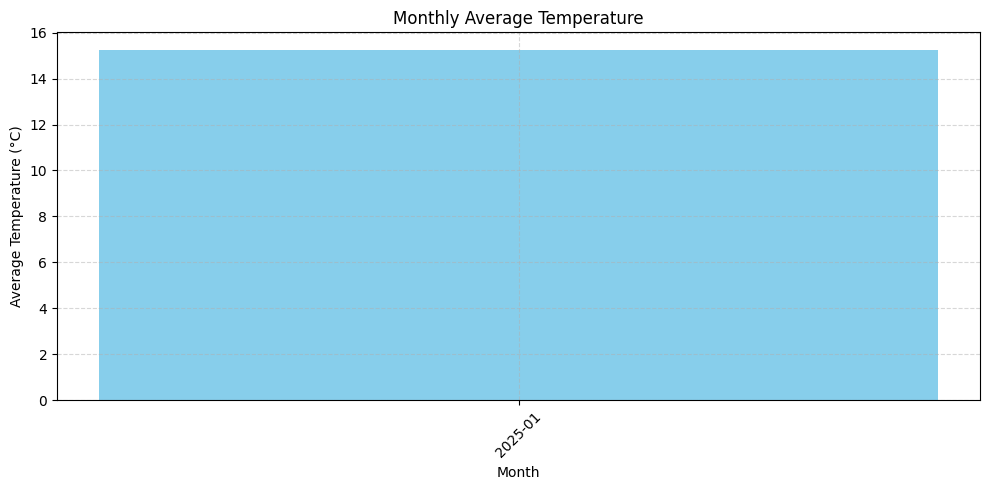

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the CSV file
df = pd.read_csv('/content/weather_data - Sheet1.csv', parse_dates=['Date'], dayfirst=True)

# 2. Check for missing values
print("Missing Values Before Handling:\n", df.isnull().sum())

# 3. Handle missing values (e.g., fill numeric columns with mean)
df.fillna(df.mean(numeric_only=True), inplace=True)

print("\nMissing Values After Handling:\n", df.isnull().sum())

# 4. Extract month and year
df['Month'] = df['Date'].dt.to_period('M')

# 5. Calculate average temperature per month
monthly_avg_temp = df.groupby('Month')['Temperature'].mean().reset_index()
monthly_avg_temp['Month'] = monthly_avg_temp['Month'].astype(str)

# 6. Visualization
plt.figure(figsize=(10, 5))
plt.bar(monthly_avg_temp['Month'], monthly_avg_temp['Temperature'], color='skyblue')
plt.title('Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [13]:
import pandas as pd

# 1. Load the student scores CSV
df = pd.read_csv('/content/student_scores - Sheet1.csv')

# a. Display summary statistics for each subject
print("=== Summary Statistics for Each Subject ===")
print(df[['Maths', 'Physics', 'Chemistry']].describe())

print("\n")

# b. Calculate average score for each student
df['Average Score'] = df[['Maths', 'Physics', 'Chemistry']].mean(axis=1)
print("=== Average Scores per Student ===")
print(df[[ 'Name', 'Average Score']])

print("\n")

# c. Identify students scoring below 60 in more than two subjects
subject_scores = df[['Maths', 'Physics', 'Chemistry']]
below_60_counts = (subject_scores < 60).sum(axis=1)
students_below_60 = df[below_60_counts > 2]

print("=== Students Who Scored Below 60 in More Than Two Subjects ===")
if students_below_60.empty:
    print("No students found.")
else:
    print(students_below_60[['Name', 'Maths', 'Physics', 'Chemistry']])


=== Summary Statistics for Each Subject ===
           Maths    Physics  Chemistry
count  10.000000  10.000000  10.000000
mean   78.900000  79.100000  78.900000
std    11.618472  12.449453  11.080012
min    60.000000  55.000000  58.000000
25%    71.000000  72.750000  74.500000
50%    80.000000  79.000000  79.000000
75%    87.250000  87.250000  86.750000
max    95.000000  96.000000  94.000000


=== Average Scores per Student ===
          Name  Average Score
0  Alice Brown      86.666667
1   Ben Carter      77.666667
2  Clara Davis      92.000000
3  David Evans      66.333333
4   Eva Foster      76.000000
5  Frank Green      57.666667
6   Grace Hall      86.333333
7   Henry Ives      72.000000
8   Isla Jones      95.000000
9    Jack King      80.000000


=== Students Who Scored Below 60 in More Than Two Subjects ===
No students found.


=== Summary Statistics for Departure Delays ===
count      9.000000
mean    -393.888889
std      191.879158
min     -654.000000
25%     -495.000000
50%     -408.000000
75%     -300.000000
max        0.000000
Name: Departure Delay (min), dtype: float64


Airline data is missing, skipping average delay per airline calculation.


Required columns for origin/destination analysis not found.




<ipython-input-16-ce53241d4f70>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['departure time'] = pd.to_datetime(df['departure time'])


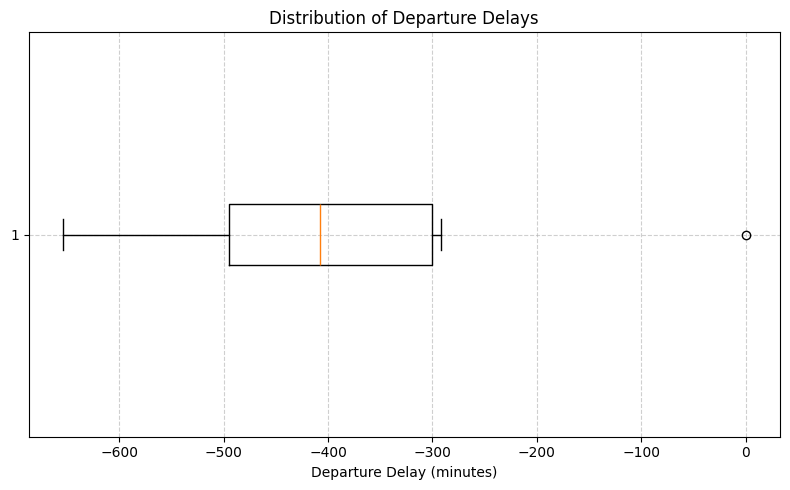

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the flight data from the CSV file
df = pd.read_csv('/content/flight_data - Sheet1.csv')

# Convert 'Departure Time' column to datetime format
df['departure time'] = pd.to_datetime(df['departure time'])

# 2. Simulate a scheduled departure time (e.g., assume scheduled time is at 12:00 PM for each flight)
df['Scheduled Departure Time'] = df['departure time'].dt.date.astype(str) + ' 12:00:00'  # Set scheduled time to 12 PM
df['Scheduled Departure Time'] = pd.to_datetime(df['Scheduled Departure Time'])

# 3. Calculate the departure delay (in minutes) by comparing actual departure time with scheduled departure time
df['Departure Delay (min)'] = (df['departure time'] - df['Scheduled Departure Time']).dt.total_seconds() / 60

# a. Display the summary statistics for departure delays
print("=== Summary Statistics for Departure Delays ===")
print(df['Departure Delay (min)'].describe())

print("\n")

# b. Calculate the average delay for each airline (if airline data exists)
if 'Airline' in df.columns:
    avg_delay_per_airline = df.groupby('Airline')['Departure Delay (min)'].mean().sort_values(ascending=False)
    print("=== Average Departure Delay per Airline ===")
    print(avg_delay_per_airline)
else:
    print("Airline data is missing, skipping average delay per airline calculation.")

print("\n")

# c. Identify the most common departure and arrival destinations
if 'Origin' in df.columns and 'destination' in df.columns:
    most_common_origin = df['origin'].mode()[0]
    most_common_destination = df['destination'].mode()[0]

    print("=== Most Common Airports ===")
    print(f"Most Common Origin Airport: {most_common_origin}")
    print(f"Most Common Destination Airport: {most_common_destination}")
else:
    print("Required columns for origin/destination analysis not found.")

print("\n")

# d. Visualize the distribution of departure delays using a box plot
plt.figure(figsize=(8, 5))
plt.boxplot(df['Departure Delay (min)'].dropna(), vert=False)
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [1]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Sample dataset: [feature1, feature2], label
X = np.array([
    [1, 2],  # Class 0
    [2, 3],  # Class 0
    [3, 3],  # Class 1
    [6, 5],  # Class 1
    [7, 7]   # Class 1
])
y = np.array([0, 0, 1, 1, 1])
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X, y)
test_point = np.array([[3, 4]])
predicted_class = knn.predict(test_point)
print("Predicted class for", test_point[0], "is:", predicted_class[0])

distances, indices = knn.kneighbors(test_point)
print("Distances to neighbors:", distances)
print("Indices of neighbors:", indices)


Predicted class for [3 4] is: 0
Distances to neighbors: [[1.         1.41421356 2.82842712]]
Indices of neighbors: [[2 1 0]]


Basic Statistics:
        Temperature
count   366.000000
mean      9.976449
std       7.494212
min      -5.540648
25%       2.992936
50%       9.837282
75%      17.062052
max      23.750968


<ipython-input-2-42e71a5bfe24>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M').mean()


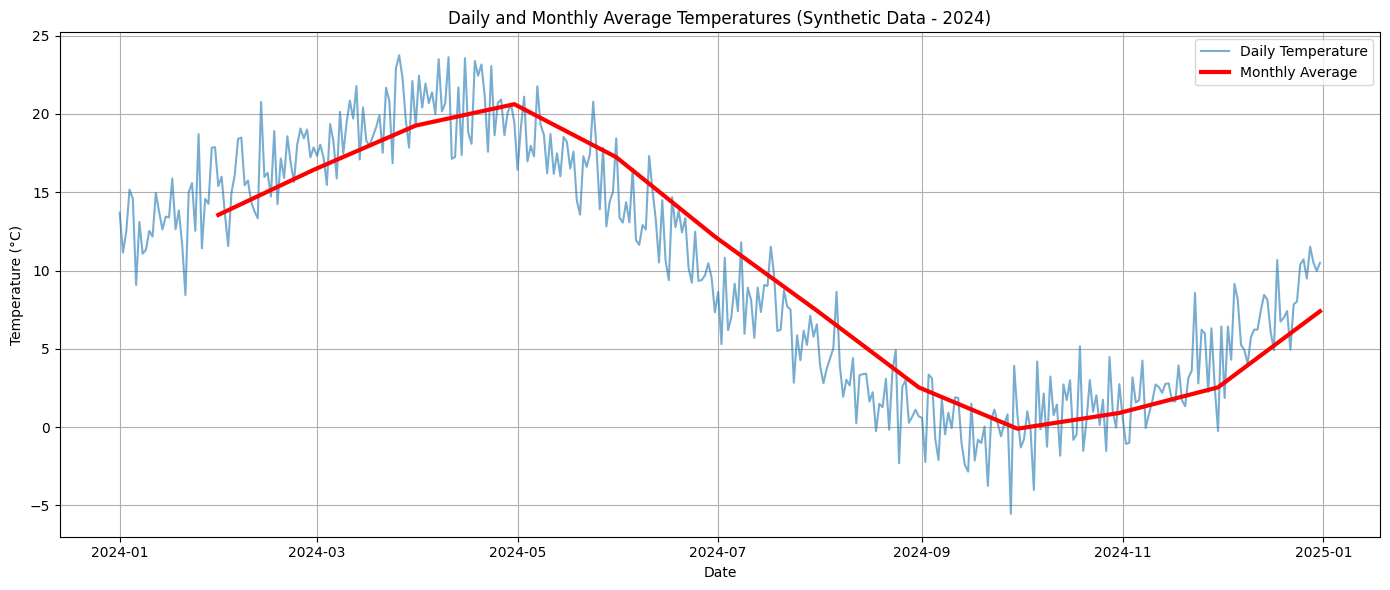

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)
days = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')
n_days = len(days)
temperature = 10 + 10 * np.sin(2 * np.pi * days.dayofyear / 365) + np.random.normal(0, 2, n_days)
df = pd.DataFrame({'Date': days, 'Temperature': temperature})
df.set_index('Date', inplace=True)

print("Basic Statistics:\n", df.describe())
monthly_avg = df.resample('M').mean()
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Temperature'], label='Daily Temperature', alpha=0.6)
plt.plot(monthly_avg.index, monthly_avg['Temperature'], label='Monthly Average', linewidth=3, color='red')

plt.title("Daily and Monthly Average Temperatures (Synthetic Data - 2024)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Basic Statistics:
        Stock Price  Daily Return
count   262.000000    261.000000
mean    100.516004      0.000566
std       6.974309      0.009756
min      91.063224     -0.025370
25%      95.302531     -0.006499
50%      97.583705      0.001083
75%     104.530882      0.006780
max     116.160149      0.039799


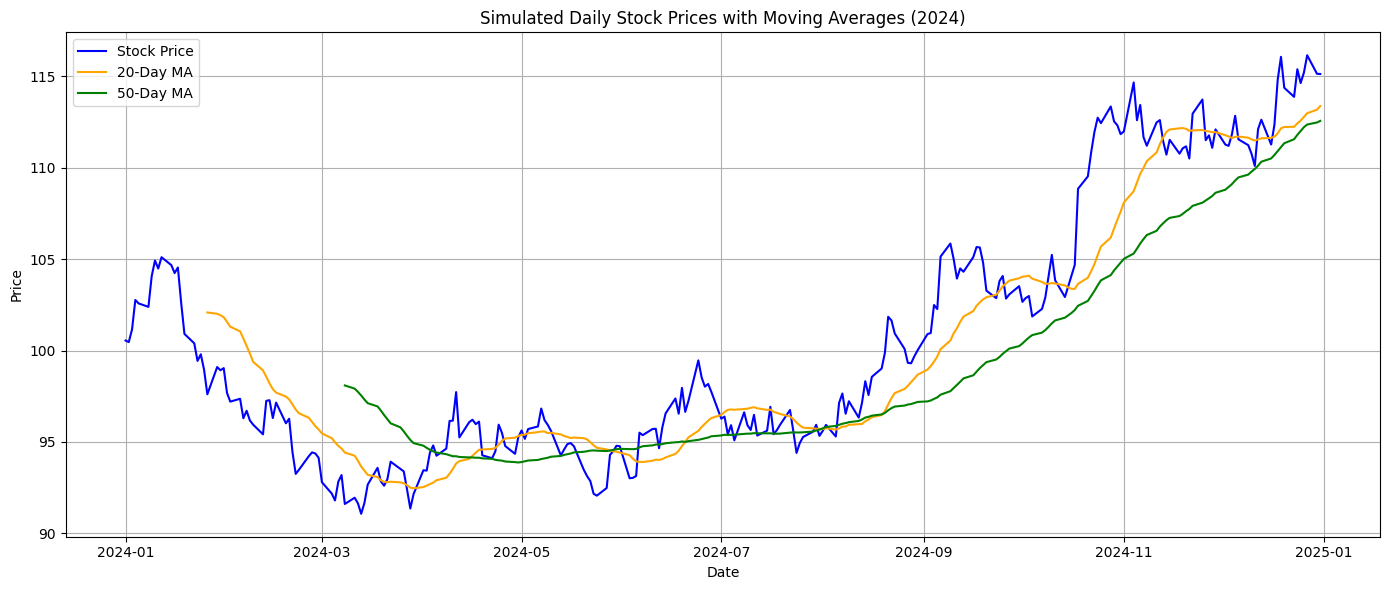

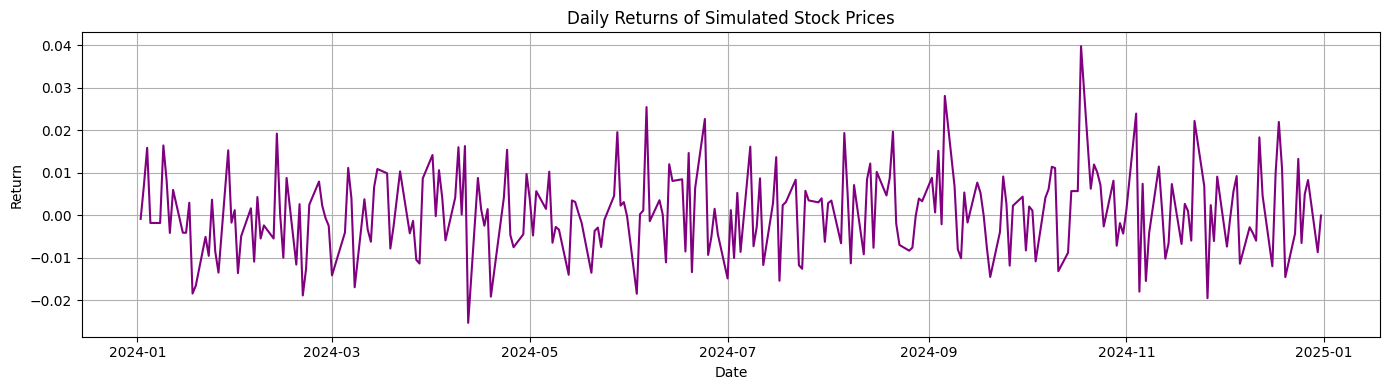

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Simulate daily stock prices over a year (252 trading days)
np.random.seed(42)
days = pd.bdate_range(start='2024-01-01', end='2024-12-31')  # business days
n_days = len(days)

# Parameters for stock price simulation
initial_price = 100
mu = 0.0005        # daily return
sigma = 0.01       # daily volatility

# Generate daily returns using geometric Brownian motion
daily_returns = np.random.normal(mu, sigma, n_days)
price_series = initial_price * np.exp(np.cumsum(daily_returns))

# Create DataFrame
df = pd.DataFrame({'Date': days, 'Stock Price': price_series})
df.set_index('Date', inplace=True)

# 2. Basic Metrics
df['Daily Return'] = df['Stock Price'].pct_change()
print("Basic Statistics:\n", df.describe())

# 3. Moving Averages
df['MA20'] = df['Stock Price'].rolling(window=20).mean()
df['MA50'] = df['Stock Price'].rolling(window=50).mean()

# 4. Plot Stock Price and Moving Averages
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Stock Price'], label='Stock Price', color='blue')
plt.plot(df.index, df['MA20'], label='20-Day MA', color='orange')
plt.plot(df.index, df['MA50'], label='50-Day MA', color='green')
plt.title("Simulated Daily Stock Prices with Moving Averages (2024)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Plot Daily Returns
plt.figure(figsize=(14, 4))
plt.plot(df.index, df['Daily Return'], label='Daily Return', color='purple')
plt.title("Daily Returns of Simulated Stock Prices")
plt.xlabel("Date")
plt.ylabel("Return")
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd

# a. Create two lists and zip them into a DataFrame
data = ['Apple', 'Banana', 'Cherry', 'Date', 'Elderberry']
prices = [1.20, 0.50, 2.50, 3.00, 1.75]

# Create DataFrame
fruits_df = pd.DataFrame(list(zip(data, prices)), columns=['Fruit', 'Price'])

# b. Use info() to get DataFrame info
print("DataFrame Info:")
fruits_df.info()

print("\n" + "-"*40)

# c. Print entire DataFrame using to_string()
print("Full DataFrame:")
print(fruits_df.to_string())

print("\n" + "-"*40)

# d. Descriptive statistics for "Price"
print("Descriptive Statistics for Price:")
print(fruits_df['Price'].describe())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fruit   5 non-null      object 
 1   Price   5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 212.0+ bytes

----------------------------------------
Full DataFrame:
        Fruit  Price
0       Apple   1.20
1      Banana   0.50
2      Cherry   2.50
3        Date   3.00
4  Elderberry   1.75

----------------------------------------
Descriptive Statistics for Price:
count    5.000000
mean     1.790000
std      0.997747
min      0.500000
25%      1.200000
50%      1.750000
75%      2.500000
max      3.000000
Name: Price, dtype: float64
